In [30]:
!pip install matplotlib deap
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from deap import base,creator,tools,algorithms

In [31]:
num_locations=15
locations=[(random.randint(0,100),random.randint(0,100)) for _ in range(num_locations)]
depot=(50,40)
num_vehicles=3
creator.create("FitnessMin",base.Fitness,weights=(-1.0,-1.0))
creator.create("Individual",list,fitness=creator.FitnessMin)
toolbox=base.Toolbox()
toolbox.register("indices",random.sample,range(num_locations),num_locations)
toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population",tools.initRepeat,list,toolbox.individual)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
def evalVRP(individual):
  total_dis=0
  distances=[]
  for i in range(num_vehicles):
    vehicle_route=[depot]+[locations[individual[j]] for j in range(i,len(individual),num_vehicles)]+[depot]
    current_location = depot
    for k in range(len(vehicle_route) - 1):
      location = vehicle_route[k + 1]
      dis = np.sqrt((current_location[0] - location[0])**2 + (current_location[1] - location[1])**2)
      total_dis += dis
      distances.append(dis)
      current_location = location
  sd=np.std(distances)
  return total_dis,sd
toolbox.register("evaluate",evalVRP)

In [33]:
toolbox.register("mate",tools.cxPartialyMatched)
toolbox.register("mutate",tools.mutShuffleIndexes,indpb=0.05)
toolbox.register("select",tools.selRoulette)

In [34]:
def plot_routes(individual, title="Optimal Routes"):
    plt.figure()
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	100   	468.726	15.9043
1  	81    	469.411	14.5624
2  	81    	467.482	16.3009
3  	75    	468.974	16.7513
4  	80    	472.807	15.3377
5  	70    	470.068	12.0322
6  	71    	470.431	12.0322
7  	71    	471.998	12.0322
8  	89    	473.174	12.0321
9  	77    	472.713	12.0321
10 	79    	466.146	14.2753
11 	74    	470.743	15.7839
12 	75    	468.247	15.7839
13 	75    	470.54 	15.858 
14 	76    	465.032	15.3153
15 	84    	466.435	14.1057
16 	83    	467.388	16.671 
17 	75    	472.064	16.3535
18 	68    	473.989	15.6796
19 	78    	474.193	14.7144
20 	78    	480.288	14.8965
21 	70    	480.331	15.24  
22 	75    	479.992	15.24  
23 	80    	472.254	14.7791
24 	66    	465.167	13.2192
25 	80    	470.834	15.5477
26 	76    	464.847	14.6595
27 	73    	470.511	16.8276
28 	80    	466.247	15.3762
29 	84    	464.213	14.7154
30 	77    	466.699	15.751 


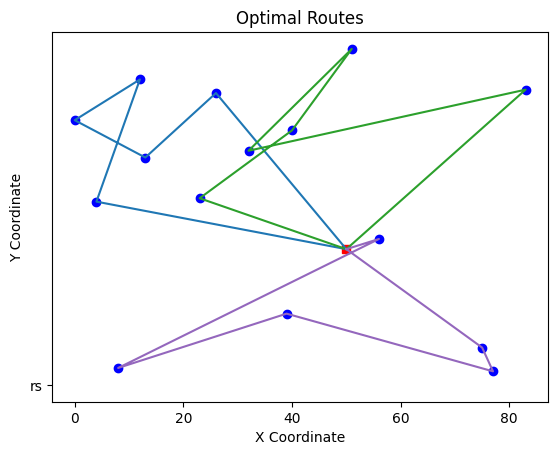

In [35]:
def main():
  random.seed(42)
  pop=toolbox.population(n=100)
  hof=tools.HallOfFame(1)
  stats=tools.Statistics(lambda ind:ind.fitness.values)
  stats.register("avg",np.mean)
  stats.register("min",np.min)
  algorithms.eaSimple(pop,toolbox,0.7,0.2,30,stats=stats,halloffame=hof)
  plot_routes(hof[0])
  return pop,stats,hof
if __name__=="__main__":
  main()